cost: 0.016836047
cost: 0.005762766
cost: 0.004535464
cost: 0.0016415447
cost: 0.0005311231
cost: 0.0004859398
cost: 0.00048331413
W: [[-0.22782367  0.9079796  -0.45850947 -0.03576804 -0.11348122  0.14848782
   0.9212018   1.5231398   0.46306726  0.0537527 ]] b: [ 0.01107421  0.34703907 -0.04404182  0.34347767  0.11290237 -0.00388567
  0.3340401  -0.6264598  -0.01924565 -0.20952229]
[[ 2.40653113e-01]
 [ 2.36701444e-01]
 [ 2.32759371e-01]
 [ 2.28827104e-01]
 [ 2.24905893e-01]
 [ 2.20996022e-01]
 [ 2.17098564e-01]
 [ 2.13213697e-01]
 [ 2.09342405e-01]
 [ 2.05485404e-01]
 [ 2.01643333e-01]
 [ 1.97816774e-01]
 [ 1.94006547e-01]
 [ 1.90213233e-01]
 [ 1.86437637e-01]
 [ 1.82680488e-01]
 [ 1.78942367e-01]
 [ 1.75223976e-01]
 [ 1.71526060e-01]
 [ 1.67849258e-01]
 [ 1.64194405e-01]
 [ 1.60562009e-01]
 [ 1.56952873e-01]
 [ 1.53367803e-01]
 [ 1.49807096e-01]
 [ 1.46271884e-01]
 [ 1.42762691e-01]
 [ 1.39280260e-01]
 [ 1.35825127e-01]
 [ 1.32398069e-01]
 [ 1.28999859e-01]
 [ 1.25630870e-01]
 [ 1.2

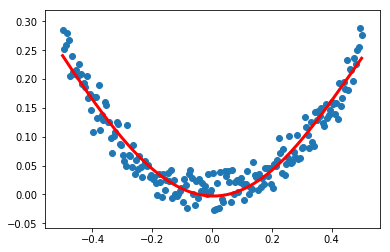

In [4]:
#加激活函数的方法1：mode.add(Activation(''))
from keras.models import Sequential

from keras.optimizers import SGD
from keras.layers import Dense,Activation
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x_data=np.linspace(-0.5,0.5,200)
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

#构建一个顺序模型
model=Sequential()

#在模型中添加一个全连接层
#units是输出维度,input_dim是输入维度(shift+两次tab查看函数参数)
#输入1个神经元,隐藏层10个神经元,输出层1个神经元
model.add(Dense(units=10,input_dim=1))
model.add(Activation('tanh'))   #增加非线性激活函数
model.add(Dense(units=1))   #默认连接上一层input_dim=10
model.add(Activation('tanh'))

#定义优化算法(修改学习率)
defsgd=SGD(lr=0.3)

#编译模型
model.compile(optimizer=defsgd,loss='mse')   #optimizer参数设置优化器,loss设置目标函数

#训练模型
for step in range(3001):
    #每次训练一个批次
    cost=model.train_on_batch(x_data,y_data)
    #每500个batch打印一个cost值
    if step%500==0:
        print('cost:',cost)

#打印权值和偏置值
W,b=model.layers[0].get_weights()   #layers[0]只有一个网络层
print('W:',W,'b:',b)

#x_data输入网络中，得到预测值y_pred
y_pred=model.predict(x_data)
#print(y_pred)
plt.scatter(x_data,y_data)

plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()